## Regression on California Test Scores

1.Find the url for the California Test Score Data Set from the following website:
https://vincentarelbundock.github.io/Rdatasets/datasets.html
Read through the "DOC" file to understand the variables in the dataset, then use the following url to import the data.
https://vincentarelbundock.github.io/Rdatasets/csv/Ecdat/Caschool.csv
The target data (i.e. the dependent variable) is named "testscr". You can use all variables in the data except for "readscr" and "mathscr" in the following analysis. (These two variables were used to generate the dependent variable).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/Ecdat/Caschool.csv")
df.head()

,Unnamed: 0,distcod,county,district,grspan,enrltot,teachers,calwpct,mealpct,computer,testscr,compstu,expnstu,str,avginc,elpct,readscr,mathscr
0,1,75119,Alameda,Sunol Glen Unified,KK-08,195,10.900000,0.510200,2.040800,67,690.799988,0.343590,6384.911133,17.889910,22.690001,0.000000,691.599976,690.000000
1,2,61499,Butte,Manzanita Elementary,KK-08,240,11.150000,15.416700,47.916698,101,661.200012,0.420833,5099.380859,21.524664,9.824000,4.583333,660.500000,661.900024
2,3,61549,Butte,Thermalito Union Elementary,KK-08,1550,82.900002,55.032299,76.322601,169,643.599976,0.109032,5501.954590,18.697226,8.978000,30.000002,636.299988,650.900024
3,4,61457,Butte,Golden Feather Union Elementary,KK-08,243,14.000000,36.475399,77.049202,85,647.700012,0.349794,7101.831055,17.357143,8.978000,0.000000,651.900024,643.500000
4,5,61523,Butte,Palermo Union Elementary,KK-08,1335,71.500000,33.108601,78.427002,171,640.849976,0.128090,5235.987793,18.671329,9.080333,13.857677,641.799988,639.900024


## 1.1 Visualize the univariate distribution of the target feature and each of the three continuous explanatory variables that you think are likely to have a relationship with the target feature.

<AxesSubplot:ylabel='Frequency'>

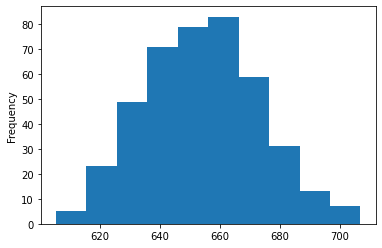

In [2]:
"""
target feature: testscr(average test score (read.scr+math.scr)/2)
calwpct: percent qualifying for CalWORKS
mealpct: percent qualifying for reduced-price lunch
avginc: computer per student
"""
new_data = df[['testscr', 'calwpct', 'mealpct', 'avginc']]
new_data['testscr'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

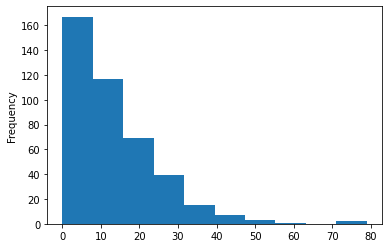

In [3]:
new_data['calwpct'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

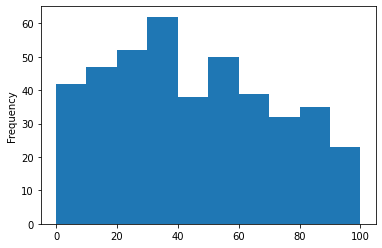

In [4]:
new_data['mealpct'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

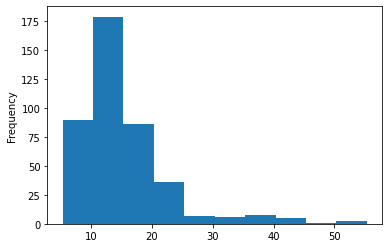

In [5]:
new_data['avginc'].plot.hist()

## 1.2 Visualize the dependency of the target on each feature from 1.1.

<AxesSubplot:xlabel='avginc', ylabel='testscr'>

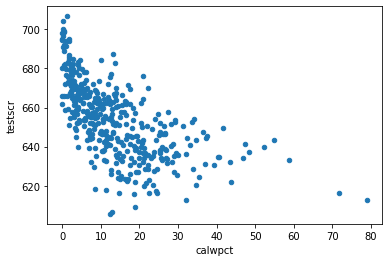

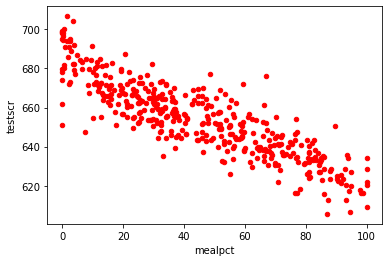

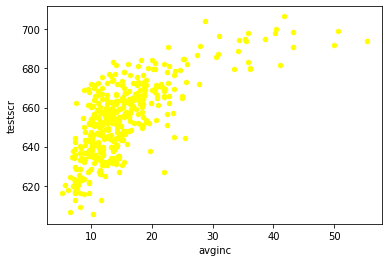

In [6]:
new_data.plot('calwpct', 'testscr', kind='scatter')
new_data.plot('mealpct', 'testscr', kind='scatter', color='red')
new_data.plot('avginc', 'testscr', kind='scatter', color='yellow')

## 1.3 Split data in training and test set. Build models that evaluate the relationship between all available X variables in the California test dataset and the target variable.

In [7]:
#Split data in training and test set
from sklearn.model_selection import train_test_split

y = df['testscr']
X = df[['enrltot','teachers','calwpct','mealpct','computer','compstu','expnstu','str','avginc','elpct']]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

### Evaluate KNN for regression, Linear Regression (OLS), Ridge, and Lasso using cross-validation with default parameters

In [8]:
#import needed model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score

In [9]:
#KNN 
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
cv_knn = cross_val_score(knn, X_test, y_test)
print("KNN original score is: {:.3f}".format(knn.score(X_test, y_test)))
print("KNN cross validation score is: {:.3f}".format(np.mean(cv_knn)))

print('\n')

#Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
cv_lr = cross_val_score(lr, X_test, y_test)
print("Linear regression original score is: {:.3f}".format(lr.score(X_test, y_test)))
print("Linear regression cross validation average score is: {:.3f}".format(np.mean(cv_lr)))

print('\n')

#Ridge
ridge = Ridge()
ridge.fit(X_train, y_train)
cv_ridge = cross_val_score(ridge, X_test, y_test)
print("Ridge original score is: {:.3f}".format(ridge.score(X_test, y_test)))
print("Ridge cross validation average score is: {:.3f}".format(np.mean(cv_ridge)))

print('\n')

#Lasso
lasso = Lasso()
lasso.fit(X_train, y_train)
cv_lasso = cross_val_score(lasso, X_test, y_test)
print("Lasso original score is: {:.3f}".format(lasso.score(X_test, y_test)))
print("Lasso cross validation average score is: {:.3f}".format(np.mean(cv_lasso)))

KNN original score is: 0.085
KNN cross validation score is: -0.015


Linear regression original score is: 0.807
Linear regression cross validation average score is: 0.738


Ridge original score is: 0.807
Ridge cross validation average score is: 0.741


Lasso original score is: 0.807
Lasso cross validation average score is: 0.753


**scaling the data with the StandardScaler**

In [10]:
#import some preprocessing modules and standard scale the data
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
scaler.fit(X_train) 
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
#KNN
knn = KNeighborsRegressor()
knn.fit(X_train_scaled, y_train)
cv_knn = cross_val_score(knn, X_test_scaled, y_test)
print("KNN original score is: {:.3f}".format(knn.score(X_test_scaled, y_test)))
print("KNN cross validation average score is: {:.3f}".format(np.mean(cv_knn)))

print('\n')

#Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
cv_lr = cross_val_score(lr, X_test_scaled, y_test)
print("Linear regression original score is: {:.3f}".format(lr.score(X_test_scaled, y_test)))
print("Linear regression cross validation average score is: {:.3f}".format(np.mean(cv_lr)))

print('\n')

#Ridge
ridge = Ridge()
ridge.fit(X_train_scaled, y_train)
cv_ridge = cross_val_score(ridge, X_test_scaled, y_test)
print("Ridge original score is: {:.3f}".format(ridge.score(X_test_scaled, y_test)))
print("Ridge cross validation average score is: {:.3f}".format(np.mean(cv_ridge)))

print('\n')

#Lasso
lasso = Lasso()
lasso.fit(X_train_scaled, y_train)
cv_lasso = cross_val_score(lasso, X_test_scaled, y_test)
print("Lasso original score is: {:.3f}".format(lasso.score(X_test_scaled, y_test)))
print("Lasso cross validation average score is: {:.3f}".format(np.mean(cv_lasso)))

KNN original score is: 0.769
KNN cross validation average score is: 0.711


Linear regression original score is: 0.807
Linear regression cross validation average score is: 0.738


Ridge original score is: 0.807
Ridge cross validation average score is: 0.747


Lasso original score is: 0.786
Lasso cross validation average score is: 0.773


### Does scaling the data with the StandardScaler help?

**My conclusion:**  
1.Scaling the data with the StandardScaler **obviously helps improve** KNN Regression model accuracy for both orginal score and cross validation score from negative score to around 0.75.  
2.Scaling the data with the StandardScaler **does not have obvious impact on** Linear Regression, Ridge or Lasso model accuracy, their score almost remain the same.

## 1.4 Tune the parameters of the models where possible using GridSearchCV.

In [12]:
#import GridSearchCV
from sklearn.model_selection import GridSearchCV

In [13]:
#KNN
param_grid_knn = {'n_neighbors': np.arange(1, 10, 1)}
grid_knn = GridSearchCV(knn, param_grid_knn)
grid_knn.fit(X_train_scaled, y_train)
cv_knn_grid = cross_val_score(grid_knn, X_test_scaled, y_test)
print("KNN GridSearchCV original score is: {:.3f}".format(grid_knn.score(X_test_scaled, y_test)))
print("KNN GridSearchCV cross validation average score is: {:.3f}".format(np.mean(cv_knn_grid)))
print("KNN best parameter is: {}".format(grid_knn.best_params_))

print('\n')

#Ridge
param_grid_ridge = {'alpha': np.arange(1, 10, 1)}
grid_ridge = GridSearchCV(ridge, param_grid_ridge)
grid_ridge.fit(X_train_scaled, y_train)
cv_ridge_grid = cross_val_score(grid_ridge, X_test_scaled, y_test)
print("Ridge GridSearchCV original score is: {:.3f}".format(grid_ridge.score(X_test_scaled, y_test)))
print("Ridge GridSearchCV cross validation average score is: {:.3f}".format(np.mean(cv_ridge_grid)))
print("Ridge GridSearchCV best parameter is: {}".format(grid_ridge.best_params_))

print('\n')

#Lasso
param_grid_lasso = {'alpha': np.arange(0.1, 1, 0.1)}
grid_lasso = GridSearchCV(ridge, param_grid_lasso)
grid_lasso.fit(X_train_scaled, y_train)
cv_lasso_grid = cross_val_score(grid_lasso, X_test_scaled, y_test)
print("Lasso GridSearchCV original score is: {:.3f}".format(grid_lasso.score(X_test_scaled, y_test)))
print("Lasso GridSearchCV cross validation average score is: {:.3f}".format(np.mean(cv_lasso_grid)))
print("Lasso GridSearchCV best parameter is: {}".format(grid_lasso.best_params_))

KNN GridSearchCV original score is: 0.782
KNN GridSearchCV cross validation average score is: 0.719
KNN best parameter is: {'n_neighbors': 6}


Ridge GridSearchCV original score is: 0.805
Ridge GridSearchCV cross validation average score is: 0.756
Ridge GridSearchCV best parameter is: {'alpha': 9}


Lasso GridSearchCV original score is: 0.807
Lasso GridSearchCV cross validation average score is: 0.747
Lasso GridSearchCV best parameter is: {'alpha': 0.9}


### Do the results improve?

The results **do not improve** for all models, the scores are almost the same.

## 1.5 Compare the coefficients of your two best linear models (not knn), do they agree on which features are important?

In [14]:
#calculate coefficients
independence = list(X.columns)
ridge_coef = ridge.coef_.tolist()
lasso_coef = lasso.coef_.tolist()

coef_dic = {"Independent" : independence,
            "Ridge_coef": ridge_coef,
            "Lasso_coef": lasso_coef}

coef = pd.DataFrame(coef_dic)
print(coef)

  Independent  Ridge_coef  Lasso_coef
0     enrltot    0.072695   -0.000000
1    teachers   -0.928104   -0.000000
2     calwpct   -1.242371   -0.000000
3     mealpct   -9.656039  -10.639962
4    computer    0.944688   -0.000000
5     compstu   -0.080996    0.000000
6     expnstu    1.157061    0.458524
7         str   -0.639715   -0.227045
8      avginc    3.738845    3.323632
9       elpct   -3.522555   -2.556799


My best linear models are Ridge and Lasso, they both agree on that **calwpct, mealpct, avginc and elpct** are important.

## 1.6 Discuss which final model you would choose to predict new data

Based on above analysis, I will choose **Lasso** to predict new data:  
1.Lasso has better test score than KNN and Linear Regression. Lasso has nearly the same test score with Ridge.  
2.Lasso could eliminate some less relative independents and make the model become much easier to understand.